# Proof of Sigmoid Variance

Explaining our variance pattern.

In [55]:
# First Import the packages.
from tvb.simulator.lab import *
from tvb.simulator.plot.tools import *
import numpy as np
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
from matplotlib.colors import ListedColormap
from turbo_colormap import *
from scipy import stats
#matplotlib.style.use('ggplot')
import inspect
import os
import csv 
import time
import math

import glob
import pandas as pd

# Now Import our data from our data folder:

# Get all csv filenames in a folder
all_files = glob.glob("do-not-track/*.csv")
#all_files

In [4]:
# Get the appropriate file

# Ye dunno why having the closing square bracket messes up glob glob. 
Sim_run_files = glob.glob("do-not-track/Old/26_6_20/NoBOLD*.csv")
Sim_run_files

['do-not-track/Old/26_6_20\\NoBOLD_MouseCortex_FCM_20200626-063944_.csv',
 'do-not-track/Old/26_6_20\\NoBOLD_MouseCortex_Params_20200626-063944_.csv',
 'do-not-track/Old/26_6_20\\NoBOLD_MouseCortex_Scorr_20200626-063944_.csv',
 'do-not-track/Old/26_6_20\\NoBOLD_MouseCortex_Tseries_20200626-063944_.csv']

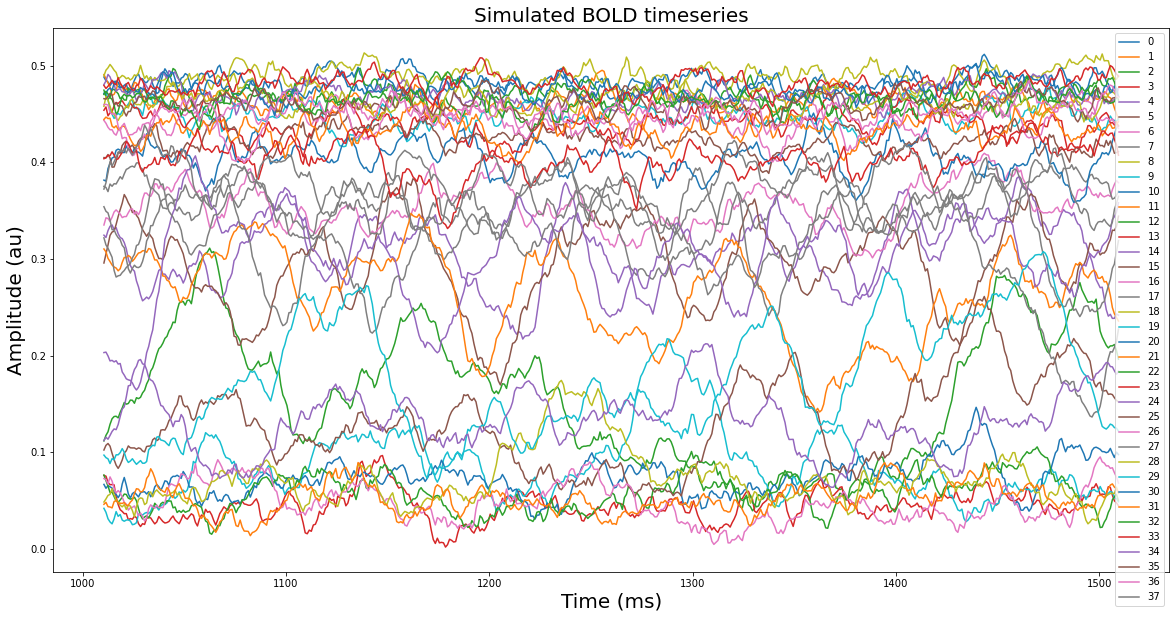

In [10]:
# Read file import data
#df = pd.read_csv(all_files[11],delimiter="\t",header=None)
# Genfromtxt gives us a np array. 
df = np.genfromtxt(Sim_run_files[-1],delimiter="\t")

bold_time = df[0]
bold_data = df[1:]

Amp = []
Mean = [] 

# plt.subplots()

#plt.figure(num=None, figsize=(60, 30), dpi=80, facecolor='w', edgecolor='k')
for tseries in bold_data:
    plt.plot(bold_time[1000:1500],tseries[1000:1500])
    A = np.max(tseries) - np.min(tseries)
    Amp.append(A/2)
    Mean.append(np.mean(tseries))

plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('Amplitude (au)', fontsize=20)
plt.title('Simulated BOLD timeseries', fontsize=20)
#plt.legend(('0','1','2','3','4'))
plt.legend(range(38))

In [82]:
J = []
# Gain function: np.exp(-Mean+2.8) / (np.exp(-Mean+2.8) + 2)**2
for Yeah in Mean:
    thing = np.exp(-Yeah+2.8) / (np.exp(-Yeah+2.8) + 2)**2
    J.append(thing)

J

[0.0688546676425663,
 0.06793655410450658,
 0.054178189774067145,
 0.04992802626741561,
 0.061083109148141766,
 0.06058586463133111,
 0.0628869921150534,
 0.06339293607663864,
 0.06915362469938603,
 0.06724777643313459,
 0.06529029955203691,
 0.05879936540223863,
 0.06815654104701067,
 0.06676457172971642,
 0.06828038616890918,
 0.0660112733021489,
 0.06705620761501394,
 0.06258116734608227,
 0.06789708871104164,
 0.051541740101368305,
 0.050790958100044685,
 0.06657808963888254,
 0.05054723344017261,
 0.06507406882420556,
 0.06033333973326784,
 0.05392184741099436,
 0.050365293772103484,
 0.06063282599510893,
 0.050524094356444275,
 0.05536666416676106,
 0.06852511101923454,
 0.05036099812571759,
 0.06791307129134103,
 0.06886206328504578,
 0.05401448672636345,
 0.06770347112127817,
 0.06734486336920738,
 0.06386436006854637]

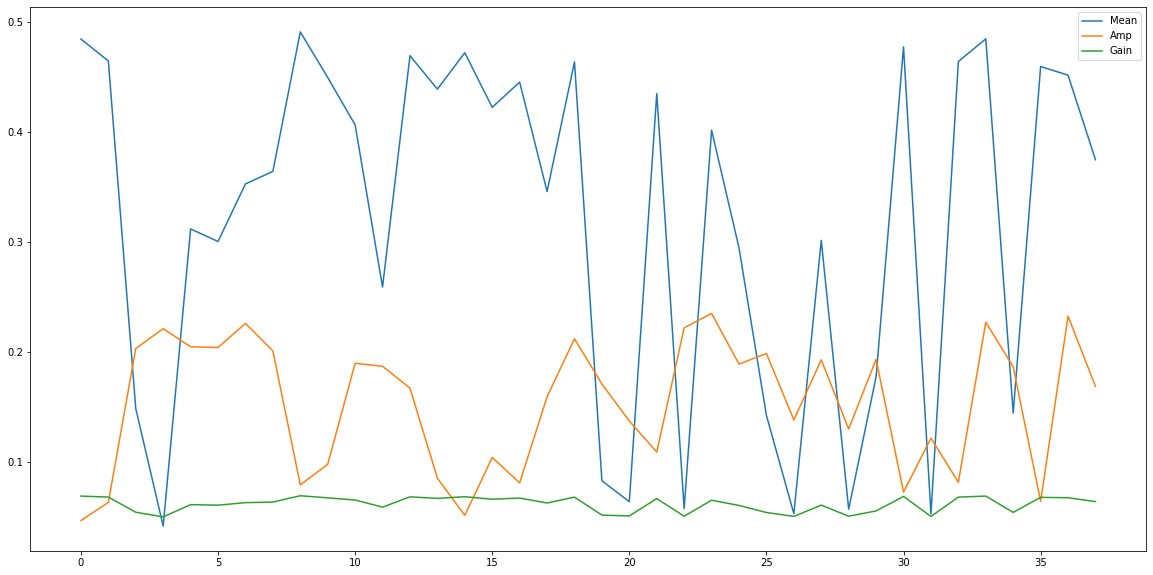

In [71]:
plt.plot(Mean)
plt.plot(Amp)
plt.plot(J)
plt.legend(('Mean','Amp','Gain'))

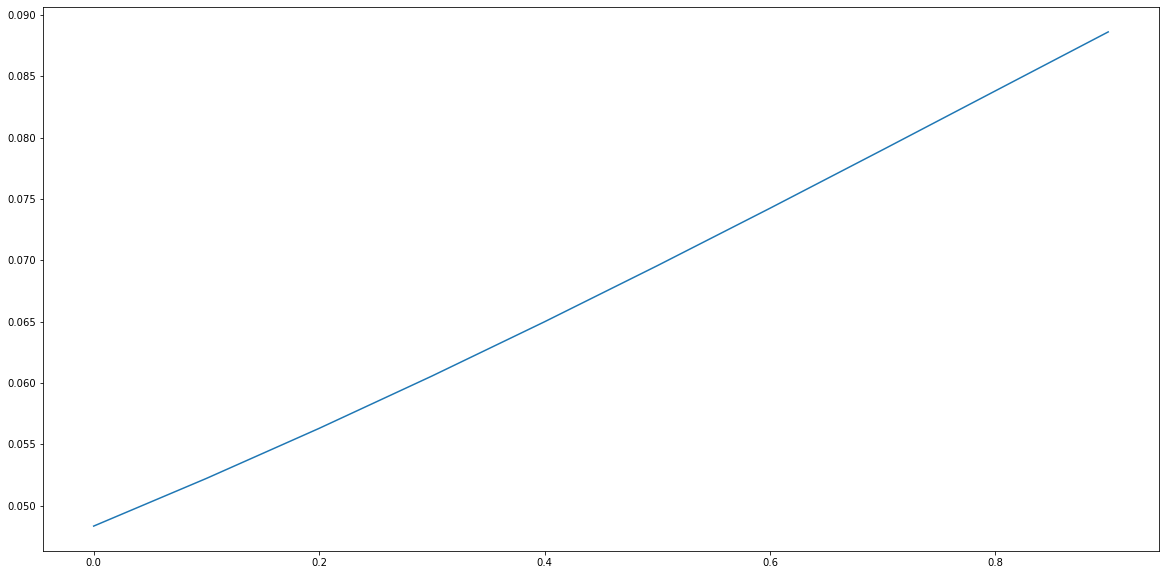

In [96]:
Yeah = np.arange(0,1,0.1)

GainFunc = np.exp(-Yeah+2.8) / (np.exp(-Yeah+2.8) + 2)**2

plt.plot(Yeah,GainFunc)